# Introduction to Librosa

What is Librosa? It is an audio processing library that we will be using in this part of the coursework here.

In [35]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
print(librosa.__version__)

import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

0.6.2


In [2]:
y, sr = librosa.load(librosa.util.example_audio_file())
print(len(y), sr)

1355168 22050


In [3]:
file_to_load = './Data/Longfiles/breath1.wav'

In [4]:
y,sr = librosa.load(file_to_load)

## Resample audio

In [5]:
y_orig, sr_orig = librosa.load(file_to_load)
sr = 44010

y = librosa.resample(y_orig, sr_orig, sr)

print(len(y), sr)

457816 44010


## Same in seconds

In [6]:
print(librosa.samples_to_time(len(y), sr))

10.402544876164509


In [7]:
print(librosa.samples_to_time(len(y_orig),sr_orig))

10.402539682539683


## Cut Audio

In [12]:
print(y.shape)
librosa.samples_to_time(43000)

(457816,)


1.9501133786848073

In [23]:
y_new = y_orig[0:43000]

<IPython.core.display.Javascript object>


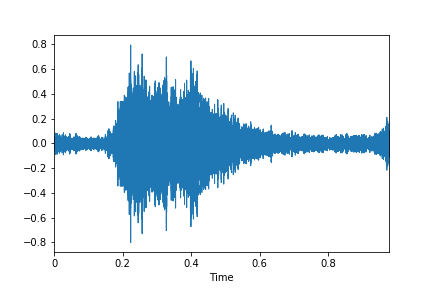

In [27]:

librosa.display.waveplot(y_new, sr = sr)

In [36]:
D = librosa.stft(y)

S, phase = librosa.magphase(D)
print(S.dtype, phase.dtype, np.allclose(D, S * phase))
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

# Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr)

print(np.allclose(melspec, melspec_stft))

float32 complex64 True
True


<IPython.core.display.Javascript object>


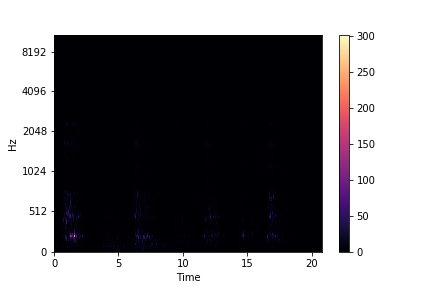

In [37]:
plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()